<a href="https://colab.research.google.com/github/sinhadeepak1115/tensorflow-deep-learning/blob/main/ML_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of Convolutional Neural Network and Computer vision with Tf

In [4]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-14 15:30:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   205MB/s    in 0.5s    

2023-06-14 15:30:07 (205 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



##Crucial step is to become one with the data in machine learning.

In [5]:
!ls pizza_steak

test  train


In [8]:
import os
# Walk through direcory and list number in files
for dirpath, dirnames, filename in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directory and {len(filename)} images in {(dirpath)} path.")

There are 2 directory and 0 images in pizza_steak path.
There are 2 directory and 0 images in pizza_steak/test path.
There are 0 directory and 250 images in pizza_steak/test/pizza path.
There are 0 directory and 250 images in pizza_steak/test/steak path.
There are 2 directory and 0 images in pizza_steak/train path.
There are 0 directory and 750 images in pizza_steak/train/pizza path.
There are 0 directory and 750 images in pizza_steak/train/steak path.


the extra 1 file is DS_Store

In [10]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [12]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


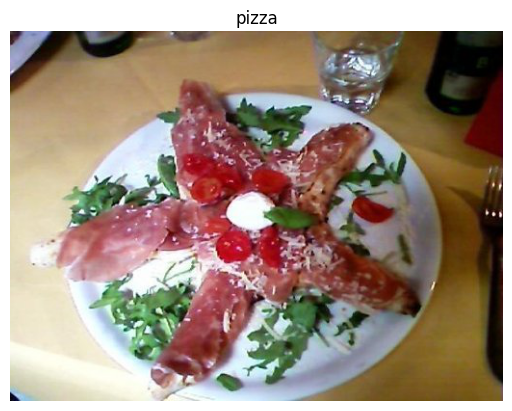

In [25]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [26]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 78,  64,  63],
        [ 72,  58,  57],
        [ 60,  46,  46],
        ...,
        [ 24,  19,  13],
        [ 23,  15,  12],
        [ 20,  12,   9]],

       [[ 78,  64,  63],
        [ 74,  60,  59],
        [ 65,  51,  51],
        ...,
        [ 26,  21,  15],
        [ 24,  16,  13],
        [ 22,  14,  11]],

       [[ 72,  56,  56],
        [ 70,  54,  55],
        [ 65,  49,  50],
        ...,
        [ 29,  22,  16],
        [ 26,  19,  13],
        [ 24,  16,  13]],

       ...,

       [[  9,   8,  16],
        [  7,   5,  18],
        [  7,   6,  24],
        ...,
        [117,  93,  49],
        [116,  89,  62],
        [115,  86,  72]],

       [[ 20,  20,  28],
        [ 10,  10,  22],
        [  9,  10,  28],
        ...,
        [119,  92,  47],
        [118,  88,  62],
        [115,  86,  70]],

       [[  0,   1,   8],
        [  6,   8,  20],
        [ 18,  19,  37],
        ...,
        [119,  92,  4

normalize data

In [28]:
img/255.

array([[[0.30588235, 0.25098039, 0.24705882],
        [0.28235294, 0.22745098, 0.22352941],
        [0.23529412, 0.18039216, 0.18039216],
        ...,
        [0.09411765, 0.0745098 , 0.05098039],
        [0.09019608, 0.05882353, 0.04705882],
        [0.07843137, 0.04705882, 0.03529412]],

       [[0.30588235, 0.25098039, 0.24705882],
        [0.29019608, 0.23529412, 0.23137255],
        [0.25490196, 0.2       , 0.2       ],
        ...,
        [0.10196078, 0.08235294, 0.05882353],
        [0.09411765, 0.0627451 , 0.05098039],
        [0.08627451, 0.05490196, 0.04313725]],

       [[0.28235294, 0.21960784, 0.21960784],
        [0.2745098 , 0.21176471, 0.21568627],
        [0.25490196, 0.19215686, 0.19607843],
        ...,
        [0.11372549, 0.08627451, 0.0627451 ],
        [0.10196078, 0.0745098 , 0.05098039],
        [0.09411765, 0.0627451 , 0.05098039]],

       ...,

       [[0.03529412, 0.03137255, 0.0627451 ],
        [0.02745098, 0.01960784, 0.07058824],
        [0.02745098, 0

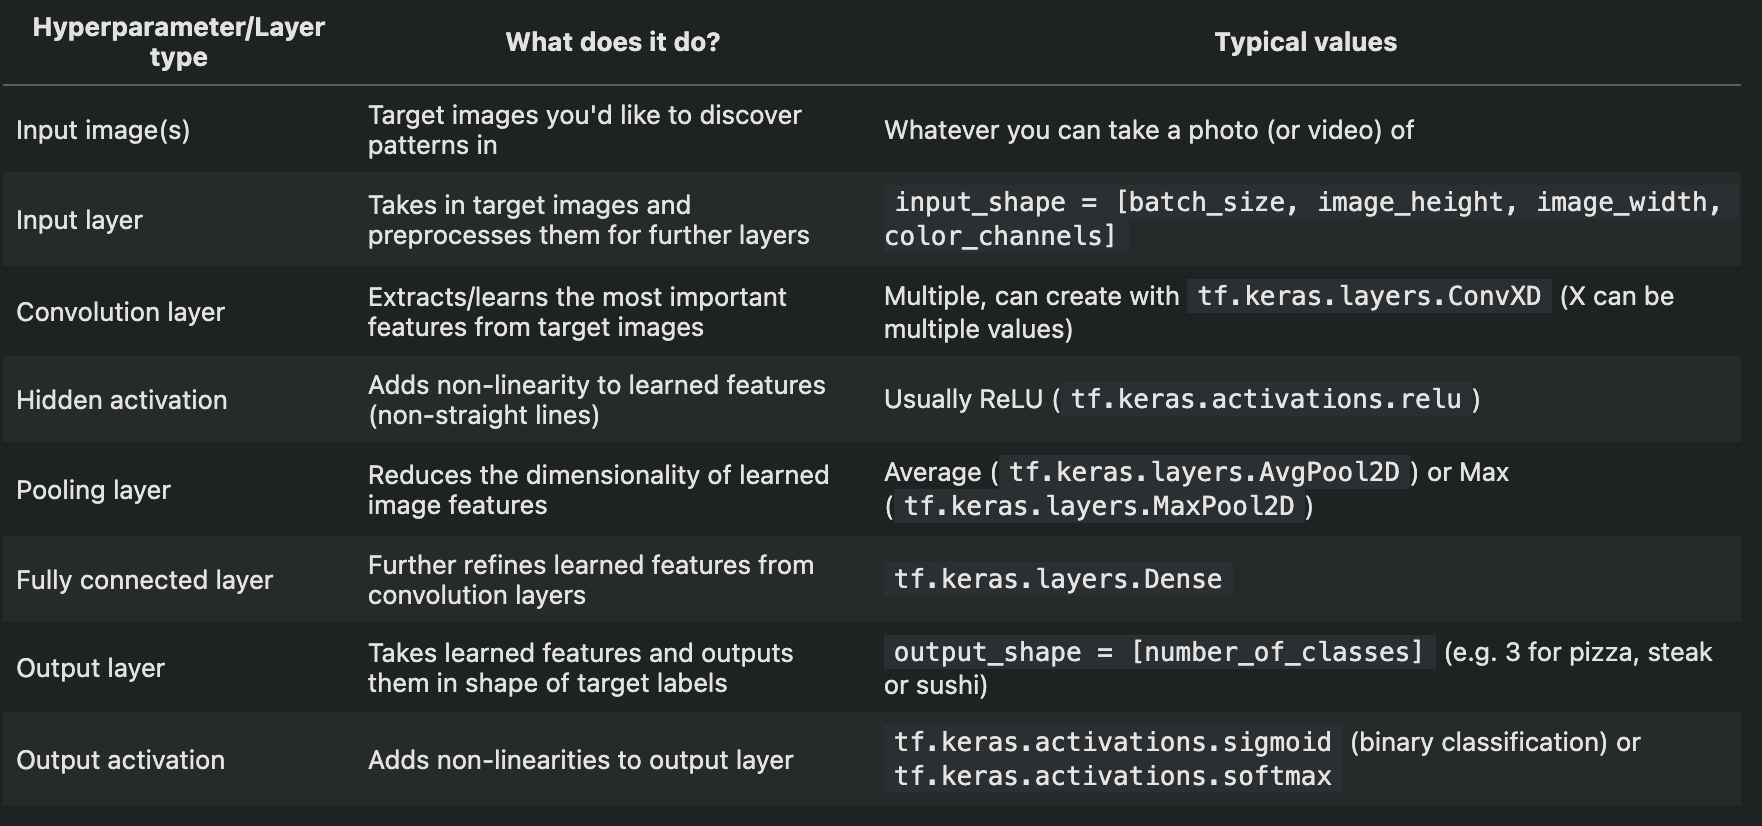

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# import data form dir and turn into batches

train_dir = "pizza_steak/train"
test_dir  = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
